# Loss Functions
--------------------------------------------------------------------------------------------------------

### Linear regression : Mean squared error

### Logistic regression : Logloss

### SVM : HingeLoss


========================================================================================================


*We can even make our own loss functions, we will now make a loss function for our perceptron*


--------------------------------------------------------------------------------------------------------
### Simple Perceptron Diagram

    Input (x0) ---+
                  |---\
                  |    \                  (loss function)
                  |     \                      |
    Input (x1) ---+------(+) --- (Activation) --- Output (ŷ)
                  |     /
                  |---/
                  |
    Bias (b) -----+


| Loss Function                     | Activation Function | Model Interpretation          | Output Range | Output Meaning                          | Typical Use Case          |
|----------------------------------|---------------------|-------------------------------|--------------|------------------------------------------|---------------------------|
| Hinge Loss                       | Step Function       | Perceptron / Linear SVM       | {-1, +1}     | Hard class decision                      | Binary classification    |
| Log Loss (Binary Cross Entropy)  | Sigmoid             | Logistic Regression           | (0, 1)       | Probability of positive class            | Binary classification    |
| Categorical Cross Entropy        | Softmax             | Softmax Regression            | (0, 1), sum=1| Probability distribution over classes   | Multiclass classification|
| Mean Squared Error        | Linear             | Linear Regression            | any number |  Regression   | Regression |

Perceptron cannot really work on non-linear data, it only works best on linear data

=============================================================================================================

# Problems with Perceptron

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
or_data = pd.DataFrame()
and_data = pd.DataFrame()
xor_data = pd.DataFrame()

In [3]:
or_data['input1']=[1,1,0,0]
or_data['input2']=[1,0,1,0]
or_data['ouput']=[1,1,1,0]

In [4]:
and_data['input1']=[1,1,0,0]
and_data['input2']=[1,0,1,0]
and_data['ouput']=[1,0,0,0]

In [5]:
xor_data['input1']=[1,1,0,0]
xor_data['input2']=[1,0,1,0]
xor_data['ouput']=[0,1,1,0]

In [6]:
and_data

,input1,input2,ouput
0,1,1,1
1,1,0,0
2,0,1,0
3,0,0,0


<Axes: xlabel='input1', ylabel='input2'>

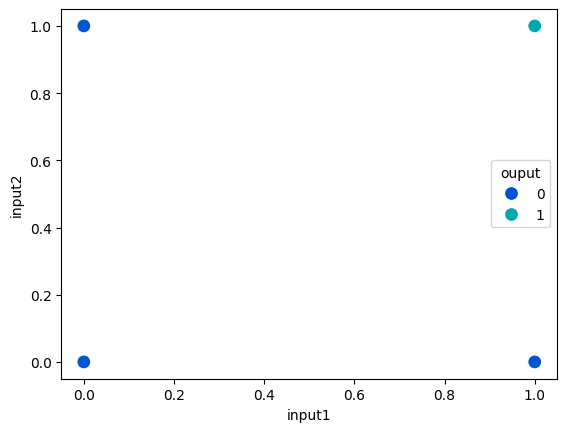

In [14]:
sns.scatterplot(
    x=and_data['input1'],
    y=and_data['input2'],
    hue=and_data['ouput'],
    s=100,
    palette='winter'
)


In [15]:
or_data

,input1,input2,ouput
0,1,1,1
1,1,0,1
2,0,1,1
3,0,0,0


<Axes: xlabel='input1', ylabel='input2'>

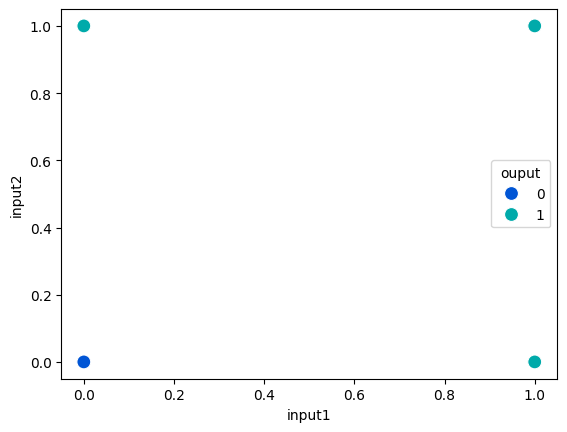

In [16]:
sns.scatterplot(
    x=or_data['input1'],
    y=or_data['input2'],
    hue=or_data['ouput'],
    s=100,
    palette='winter'
)


In [17]:
xor_data

,input1,input2,ouput
0,1,1,0
1,1,0,1
2,0,1,1
3,0,0,0


<Axes: xlabel='input1', ylabel='input2'>

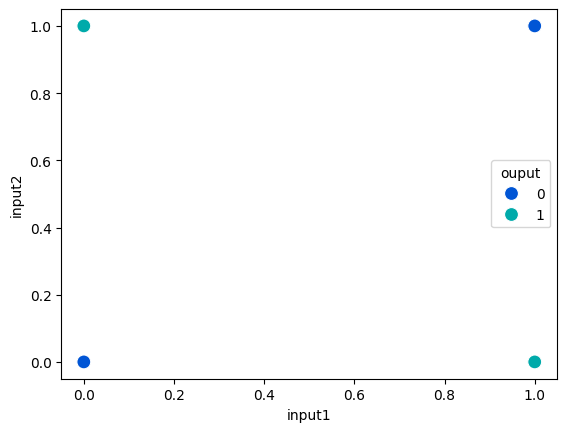

In [18]:
sns.scatterplot(
    x=xor_data['input1'],
    y=xor_data['input2'],
    hue=xor_data['ouput'],
    s=100,
    palette='winter'
)


In [19]:
from sklearn.linear_model import Perceptron
clf1=Perceptron()
clf2=Perceptron()
clf3=Perceptron()

In [20]:
clf1.fit(and_data.iloc[:,0:2].values,and_data.iloc[:,-1].values)
clf2.fit(or_data.iloc[:,0:2].values,or_data.iloc[:,-1].values)
clf3.fit(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values)

,"penalty penalty: {'l2','l1','elasticnet'}, default=NoneThe penalty (aka regularization term) to be used.",None
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term if regularization isused.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with `0 <= l1_ratio <= 1`.`l1_ratio=0` corresponds to L2 penalty, `l1_ratio=1` to L1.Only used if `penalty='elasticnet'`... versionadded:: 0.24",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, the iterations will stopwhen (loss > previous_loss - tol)... versionadded:: 0.19",0.001
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.",0
,"eta0 eta0: float, default=1Constant by which the updates are multiplied.",1.0
,"n_jobs n_jobs: int, default=NoneThe number of CPUs to use to do the OVA (One Versus All, formulti-class problems) computation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"random_state random_state: int, RandomState instance or None, default=0Used to shuffle the training data, when ``shuffle`` is set to``True``. Pass an int for reproducible output across multiplefunction calls.See :term:`Glossary `.",0


In [21]:
clf1.coef_

array([[2., 2.]])

In [22]:
clf1.intercept_

array([-2.])

In [23]:
x=np.linspace(-1,1,5)
y=-x+1

<Axes: xlabel='input1', ylabel='input2'>

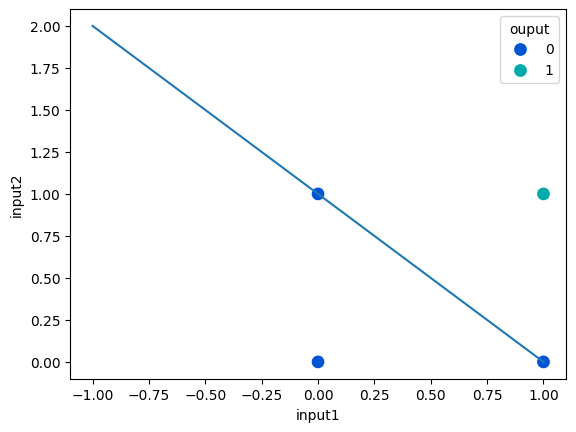

In [25]:
plt.plot(x,y)

sns.scatterplot(
    x=and_data['input1'],
    y=and_data['input2'],
    hue=and_data['ouput'],
    s=100,
    palette='winter'
)


In [26]:
clf2.coef_

array([[2., 2.]])

In [27]:
clf2.intercept_

array([-1.])

In [28]:
x1=np.linspace(-1,1,5)
y1=-x+0.5

<Axes: xlabel='input1', ylabel='input2'>

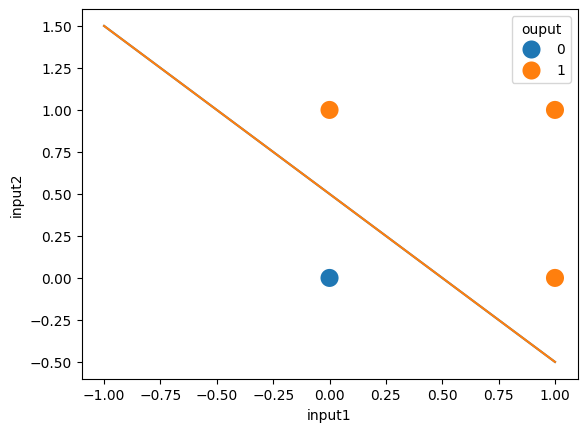

In [29]:
plt.plot(x1,y1)
plt.plot(x1,y1)
sns.scatterplot(
    x=or_data['input1'],
    y=or_data['input2'],
    hue=or_data['ouput'],
    s=200
)

In [30]:
clf3.coef_

array([[0., 0.]])

In [31]:
clf3.intercept_

array([0.])

We cannot draw a line in XOR graph cause of its non-linear nature

--------------------------------------------------------------------------------------------------------

## *Loss function* VS *cost function*


Loss function | cost function |
--------------|---------------|
single training example | for a whole batch of examples |
guide the update of parameters | evaluating overall performance |
error function  | objective function |

-----------------------------------------------------------------------------------------------------
### Some common loss functions

### 1. Mean Squared Error - Squared loss - L2 Loss


Loss Function | Cost Function |
--------------|---------------|
$$L(\hat{y}, y) = (\hat{y} - y)^2$$ | $$C = \frac{1}{n} \sum_{i=1}^{n} (\hat{y} - y)^2$$ |

### 2. Mean Absolute Error - Absolute Loss - L1 Loss

Loss Function | Cost Function |
------------- | ------------- |
$$L(\hat{y}, y) = \|(\hat{y} - y)\|$$ | $$C = \frac{1}{n} \sum_{i=1}^{n} \|(\hat{y} - y)\|$$ |

### 3. Huber loss 


MSE  -  outliers


MAE  -  Normal data

### 4. Binary Cross Entropy

Classification Problems 

Two Classes

 **Activation function at output layer must be Sigmoid function**

### 5. Categoriacal cross entropy 

Multiple Classes - Softmax function

### 6. Sparse Categoriacal Cross Entropy 

So many classes are there